<a href="https://colab.research.google.com/github/valerio03/Weather-App/blob/main/Redshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

print(os.listdir("/content/drive/MyDrive/Colab Notebooks/cell_images"))

['Uninfected', 'Parasitized']


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split


# New Section

In [4]:
# Load the dataset
data_dir = r"/content/drive/MyDrive/Colab Notebooks/cell_images"
infected_path = os.path.join(data_dir, 'Parasitized')
uninfected_path = os.path.join(data_dir, 'Uninfected')

In [5]:
# Image size & batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [6]:
# Function to load images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            images.append(img)
            labels.append(label)
    return images, labels

In [7]:
# Load images
infected_images, infected_labels = load_images_from_folder(r"/content/drive/MyDrive/Colab Notebooks/cell_images/Parasitized", 1)
uninfected_images, uninfected_labels = load_images_from_folder(r"/content/drive/MyDrive/Colab Notebooks/cell_images/Uninfected", 0)

In [8]:
# Combine data
data = np.array(infected_images + uninfected_images)
labels = np.array(infected_labels + uninfected_labels)

In [9]:
# Normalize the data
data = data / 255.0

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [11]:
# Data augmentation
data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [12]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
print("Starting training...")
history = model.fit(data_gen.flow(X_train, y_train, batch_size=BATCH_SIZE), epochs=20, validation_data=(X_test, y_test))
print("Training completed.")

Starting training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 45s 159ms/step - accuracy: 0.9858 - loss: 0.0556 - val_accuracy: 0.9753 - val_loss: 0.4832
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 0.9993 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 32s 138ms/step - accuracy: 1.0000 - loss: 1.3565e-30 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 1.0000 - loss: 1.0127e-17 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 1.0000 - loss: 1.3760e-18 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 1.0000 - loss: 1.7024e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 1.0000 - loss: 7.3201e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


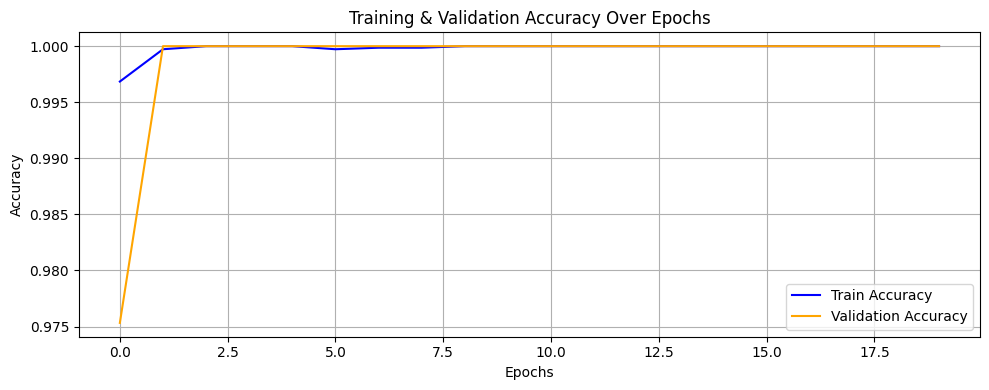

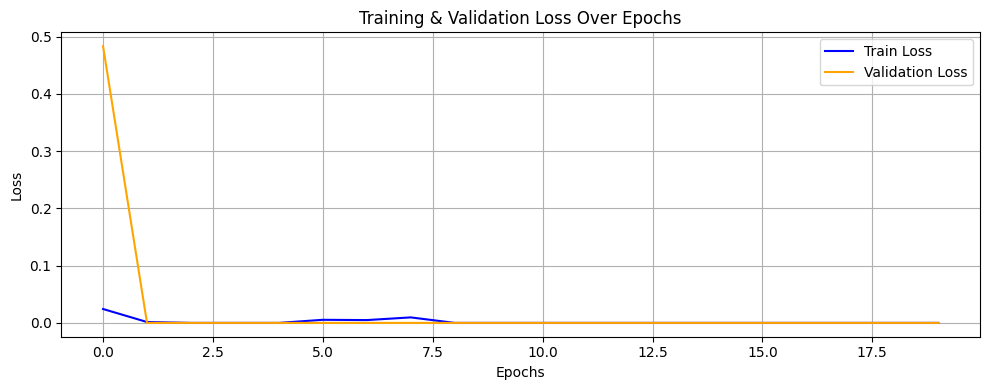

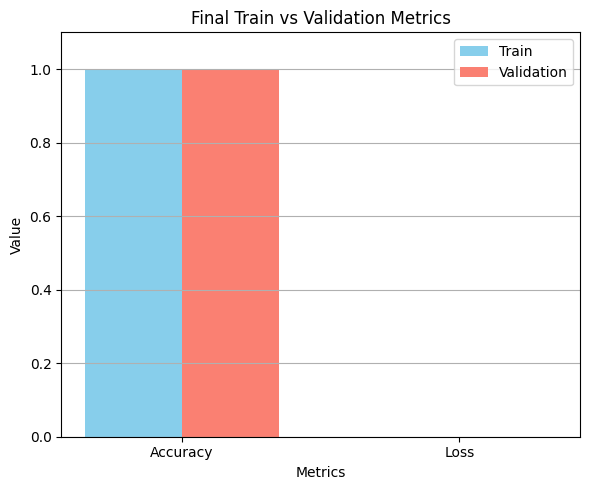

In [17]:
# Plot training history
# Line plot: Accuracy over epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot: Loss over epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot: Final accuracy and loss comparison
# Extract final values from history
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Metrics and values
metrics = ['Accuracy', 'Loss']
train_values = [final_train_acc, final_train_loss]
val_values = [final_val_acc, final_val_loss]
x = range(len(metrics))
bar_width = 0.35

# Bar chart
plt.figure(figsize=(6, 5))
plt.bar([i - bar_width/2 for i in x], train_values, width=bar_width, label='Train', color='skyblue')
plt.bar([i + bar_width/2 for i in x], val_values, width=bar_width, label='Validation', color='salmon')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Final Train vs Validation Metrics')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
